## Notebook DCC013 e DCC107

Iremos unir os arquivos da pasta planos-departamentais e situacao-turmas para construir um DataFrame e avaliar o desempenho dessas duas turmas

A questão a ser analisada será sobre a ocupação das turmas e o abandono da disiplina pelos alunos. Diminuir o número de vagas da turma estrutuda de dados, surtiu efeito na taxa de abandono da disciplina? Essa taxa caiu?

Importação das bibliotecas que serão usadas

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from stackbar import mycatplot

Display todas as colunas e linhas 

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

Aquivos que devam ser concertados, usar notebook correcao antes de rodá-los aqui

In [3]:
pasta = "situacao-turmas/"
modificado = "-mod"
anos = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
periodos = ['1', '3']

Ler cada pasta e conecta os dados 

In [4]:
df_anos = []
for ano in anos:
    df_periodos = []
    for periodo in periodos:
        df = pd.read_csv(pasta + str(ano) + "." + periodo + modificado + ".csv", sep = ';', 
                         encoding = 'ISO-8859-1', error_bad_lines=False, warn_bad_lines=True,
                        index_col = ['DISCIPLINA', 'TURMA'])
        df_periodos.append (df)
    df_anos.append(pd.concat(df_periodos, keys=periodos))

df_final = pd.concat (df_anos, keys=anos, names=['ANO', 'PERIODO', 'DISCIPLINA', 'TURMA']).reset_index()
display(df_final)

,ANO,PERIODO,DISCIPLINA,TURMA,NOME,VAGAS OFERECIDAS,VAGAS OCUPADAS,CURSO,SITUACAO,TOTAL DE ALUNOS
0,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,35A - CIÊNCIA DA COMPUTAÇÃO,Aprovado,7
1,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65AB - OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENH...,Aprovado,1
2,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65AC - OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCI...,Aprovado,4
3,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65C - CIÊNCIA DA COMPUTAÇÃO,Aprovado,1
4,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,22A - CIÊNCIA DA COMPUTAÇÃO,Rep Freq,1
...,...,...,...,...,...,...,...,...,...,...
20065,2020,3,2035038,A,TÓPICOS ESPECIAIS EM ENGENHARIA DE SOFTWARE E ...,20,2,2035 - MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,Aprovado,2
20066,2020,3,2035038,B,TÓPICOS ESPECIAIS EM ENGENHARIA DE SOFTWARE E ...,20,1,2035 - MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,Aprovado,1
20067,2020,3,219025,C,APLICAÇÕES EM E-SCIENCE,115,2,2019 - MESTRADO EM MODELAGEM COMPUTACIONAL,Aprovado,1
20068,2020,3,219025,C,APLICAÇÕES EM E-SCIENCE,115,2,3012 - DOUTORADO EM MODELAGEM COMPUTACIONAL,Aprovado,1


Separa o codigo do curso do nome do curso

In [5]:
df = df_final['CURSO'].str.split(' - ', expand=True, n=1)
display(df)

,0,1
0,35A,CIÊNCIA DA COMPUTAÇÃO
1,65AB,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA CO...
2,65AC,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCIA DA CO...
3,65C,CIÊNCIA DA COMPUTAÇÃO
4,22A,CIÊNCIA DA COMPUTAÇÃO
...,...,...
20065,2035,MESTRADO EM CIÊNCIA DA COMPUTAÇÃO
20066,2035,MESTRADO EM CIÊNCIA DA COMPUTAÇÃO
20067,2019,MESTRADO EM MODELAGEM COMPUTACIONAL
20068,3012,DOUTORADO EM MODELAGEM COMPUTACIONAL


In [6]:
df_final.insert(loc=8, column='CODIGO_CURSO', value=df.iloc[:,0:1])
df_final.insert(loc=9, column='NOME_CURSO', value=df.iloc[:,1:2])
display(df_final)

,ANO,PERIODO,DISCIPLINA,TURMA,NOME,VAGAS OFERECIDAS,VAGAS OCUPADAS,CURSO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TOTAL DE ALUNOS
0,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,35A - CIÊNCIA DA COMPUTAÇÃO,35A,CIÊNCIA DA COMPUTAÇÃO,Aprovado,7
1,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65AB - OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENH...,65AB,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA CO...,Aprovado,1
2,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65AC - OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCI...,65AC,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCIA DA CO...,Aprovado,4
3,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,65C - CIÊNCIA DA COMPUTAÇÃO,65C,CIÊNCIA DA COMPUTAÇÃO,Aprovado,1
4,2014,1,DCC001,A,ANALISE E PROJETO DE ALGORITMOS,70,18,22A - CIÊNCIA DA COMPUTAÇÃO,22A,CIÊNCIA DA COMPUTAÇÃO,Rep Freq,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20065,2020,3,2035038,A,TÓPICOS ESPECIAIS EM ENGENHARIA DE SOFTWARE E ...,20,2,2035 - MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,2035,MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,Aprovado,2
20066,2020,3,2035038,B,TÓPICOS ESPECIAIS EM ENGENHARIA DE SOFTWARE E ...,20,1,2035 - MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,2035,MESTRADO EM CIÊNCIA DA COMPUTAÇÃO,Aprovado,1
20067,2020,3,219025,C,APLICAÇÕES EM E-SCIENCE,115,2,2019 - MESTRADO EM MODELAGEM COMPUTACIONAL,2019,MESTRADO EM MODELAGEM COMPUTACIONAL,Aprovado,1
20068,2020,3,219025,C,APLICAÇÕES EM E-SCIENCE,115,2,3012 - DOUTORADO EM MODELAGEM COMPUTACIONAL,3012,DOUTORADO EM MODELAGEM COMPUTACIONAL,Aprovado,1


Separa as disciplinas interessadas interessadas, substitua as disciplinas entre aspas de acordo com as desejadas

In [7]:
codigo = 'DCC013'
one = df_final.query("DISCIPLINA == @codigo")
display(one)

,ANO,PERIODO,DISCIPLINA,TURMA,NOME,VAGAS OFERECIDAS,VAGAS OCUPADAS,CURSO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TOTAL DE ALUNOS
165,2014,1,DCC013,A,ESTRUTURA DE DADOS,96,63,35A - CIÊNCIA DA COMPUTAÇÃO,35A,CIÊNCIA DA COMPUTAÇÃO,Aprovado,8
166,2014,1,DCC013,A,ESTRUTURA DE DADOS,96,63,65C - CIÊNCIA DA COMPUTAÇÃO,65C,CIÊNCIA DA COMPUTAÇÃO,Aprovado,1
167,2014,1,DCC013,A,ESTRUTURA DE DADOS,96,63,67A - ENGENHARIA AMBIENTAL E SANITÁRIA,67A,ENGENHARIA AMBIENTAL E SANITÁRIA,Aprovado,2
168,2014,1,DCC013,A,ESTRUTURA DE DADOS,96,63,76A - SISTEMAS DE INFORMAÇÃO,76A,SISTEMAS DE INFORMAÇÃO,Aprovado,8
169,2014,1,DCC013,A,ESTRUTURA DE DADOS,96,63,35A - CIÊNCIA DA COMPUTAÇÃO,35A,CIÊNCIA DA COMPUTAÇÃO,Rep Freq,5
...,...,...,...,...,...,...,...,...,...,...,...,...
19101,2020,3,DCC013,B,ESTRUTURA DE DADOS,82,75,65A - CIÊNCIAS EXATAS,65A,CIÊNCIAS EXATAS,Rep Nota,4
19102,2020,3,DCC013,B,ESTRUTURA DE DADOS,82,75,65AB - OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENH...,65AB,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA CO...,Rep Nota,1
19103,2020,3,DCC013,B,ESTRUTURA DE DADOS,82,75,65D - ESTATÍSTICA,65D,ESTATÍSTICA,Rep Nota,1
19104,2020,3,DCC013,B,ESTRUTURA DE DADOS,82,75,65A - CIÊNCIAS EXATAS,65A,CIÊNCIAS EXATAS,Trancado,8


Retira linhas de vagas duplicadas e calcula a ocupação das turmas 

In [8]:
vagas_totais = one[["ANO", "PERIODO", "DISCIPLINA", "TURMA", "VAGAS OFERECIDAS", "VAGAS OCUPADAS"]].drop_duplicates()
vagas_totais["OCUPACAO EM PORCENTAGEM"] = (vagas_totais["VAGAS OCUPADAS"] / vagas_totais["VAGAS OFERECIDAS"])*100
display(vagas_totais)

,ANO,PERIODO,DISCIPLINA,TURMA,VAGAS OFERECIDAS,VAGAS OCUPADAS,OCUPACAO EM PORCENTAGEM
165,2014,1,DCC013,A,96,63,65.625000
179,2014,1,DCC013,B,66,65,98.484848
1490,2014,3,DCC013,A,59,50,84.745763
1505,2014,3,DCC013,B,75,68,90.666667
1523,2014,3,DCC013,C,57,40,70.175439
3087,2015,1,DCC013,A,80,59,73.750000
3101,2015,1,DCC013,B,70,52,74.285714
4572,2015,3,DCC013,A,70,64,91.428571
4595,2015,3,DCC013,B,74,65,87.837838
5918,2016,1,DCC013,A,75,72,96.000000


Coloca a grade atras dos gráficos

In [9]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5) 

Grafico das vagas oferecidas por disciplina de acordo com o ano e periodo

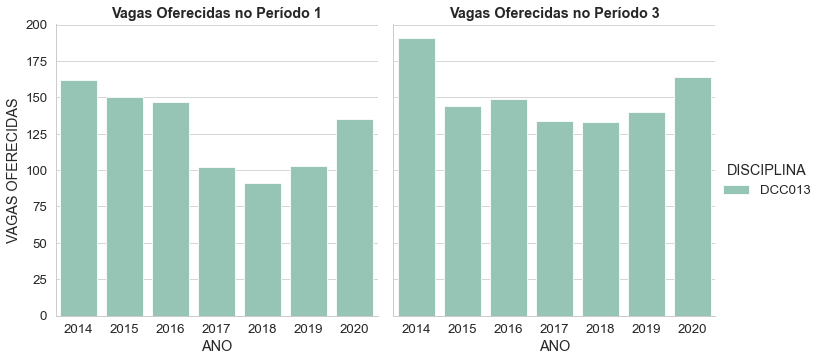

In [12]:
a = sns.catplot(data=vagas_totais, x="ANO", y="VAGAS OFERECIDAS", kind="bar", hue="DISCIPLINA", col="PERIODO",
               palette=['#8ECCB7'], estimator=np.sum, ci=None)
a.set_titles("Vagas Oferecidas no Período {col_name}", fontdict= {'fontweight':'semibold'})
a.savefig("VagasOferecidas.pdf")
a.savefig("VagasOferecidas.png")

Grafico da ocupação das turmas por disciplina de acordo com o ano e periodo

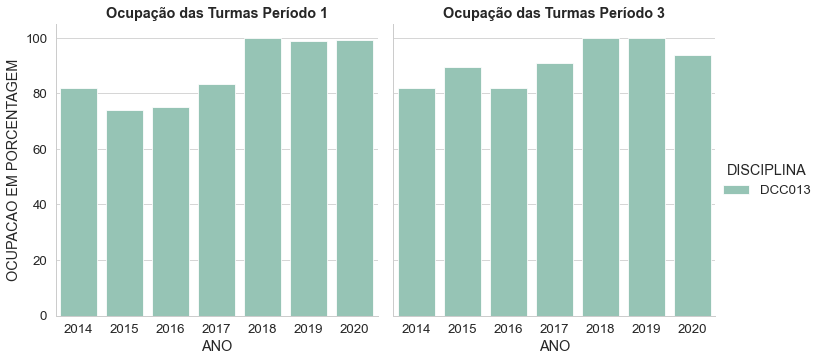

In [15]:
b = sns.catplot(data=vagas_totais, x="ANO", y="OCUPACAO EM PORCENTAGEM", palette=['#8ECCB7'], 
                kind="bar", hue="DISCIPLINA", col="PERIODO", ci=None)
b.set_titles("Ocupação das Turmas Período {col_name}", fontdict= {'fontweight':'bold'})
b.savefig("UsoDaTurma.pdf")
b.savefig("UsoDaTurma.png")

Grafico vagas oferecidas das disciplinas, em linha

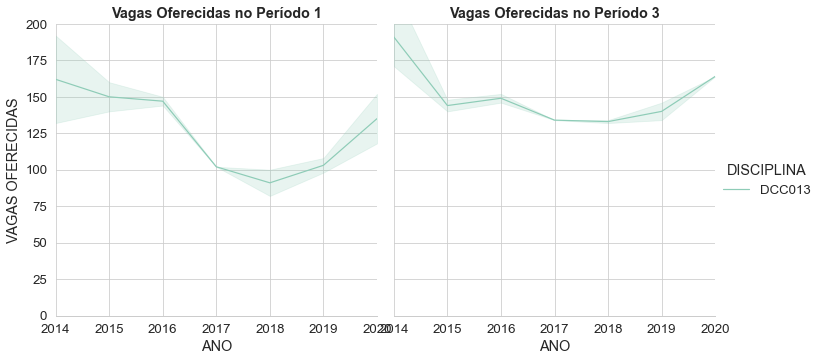

In [17]:
c = sns.relplot(data=vagas_totais, x="ANO", y="VAGAS OFERECIDAS", kind="line", col="PERIODO",
            hue="DISCIPLINA", estimator=np.sum, palette=['#8ECCB7'])
c.set(ylim = (0,200))
c.set(xlim = (2014,2020))
c.despine(left=True)
c.set_titles("Vagas Oferecidas no Período {col_name}", fontdict= {'fontweight':'semibold'})

Grafico da ocupação das disciplinas em linha 

In [ ]:
d = sns.relplot(data=vagas_totais, x="ANO", y="OCUPACAO EM PORCENTAGEM", kind="line", col="PERIODO",
            hue="DISCIPLINA", palette=['#CC527A', '#2F9395'])
d.set(ylim = (0,100))
d.set(xlim = (2014,2020))
d.despine(left=True)
d.set_titles("Ocupação das Turmas Período {col_name}", fontdict= {'fontweight':'bold'})

In [18]:
por_curso = one.groupby(["ANO", "PERIODO", "DISCIPLINA", "TURMA","CODIGO_CURSO", "NOME_CURSO"])[["TOTAL DE ALUNOS"]].sum().reset_index()
display(por_curso)

,ANO,PERIODO,DISCIPLINA,TURMA,CODIGO_CURSO,NOME_CURSO,TOTAL DE ALUNOS
0,2014,1,DCC013,A,35A,CIÊNCIA DA COMPUTAÇÃO,28
1,2014,1,DCC013,A,65A,CIÊNCIAS EXATAS,3
2,2014,1,DCC013,A,65B,ENGENHARIA COMPUTACIONAL,1
3,2014,1,DCC013,A,65C,CIÊNCIA DA COMPUTAÇÃO,1
4,2014,1,DCC013,A,67A,ENGENHARIA AMBIENTAL E SANITÁRIA,6
...,...,...,...,...,...,...,...
232,2020,3,DCC013,B,35A,CIÊNCIA DA COMPUTAÇÃO,19
233,2020,3,DCC013,B,65A,CIÊNCIAS EXATAS,48
234,2020,3,DCC013,B,65AB,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA CO...,1
235,2020,3,DCC013,B,65AD,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ESTATÍSTICA,1


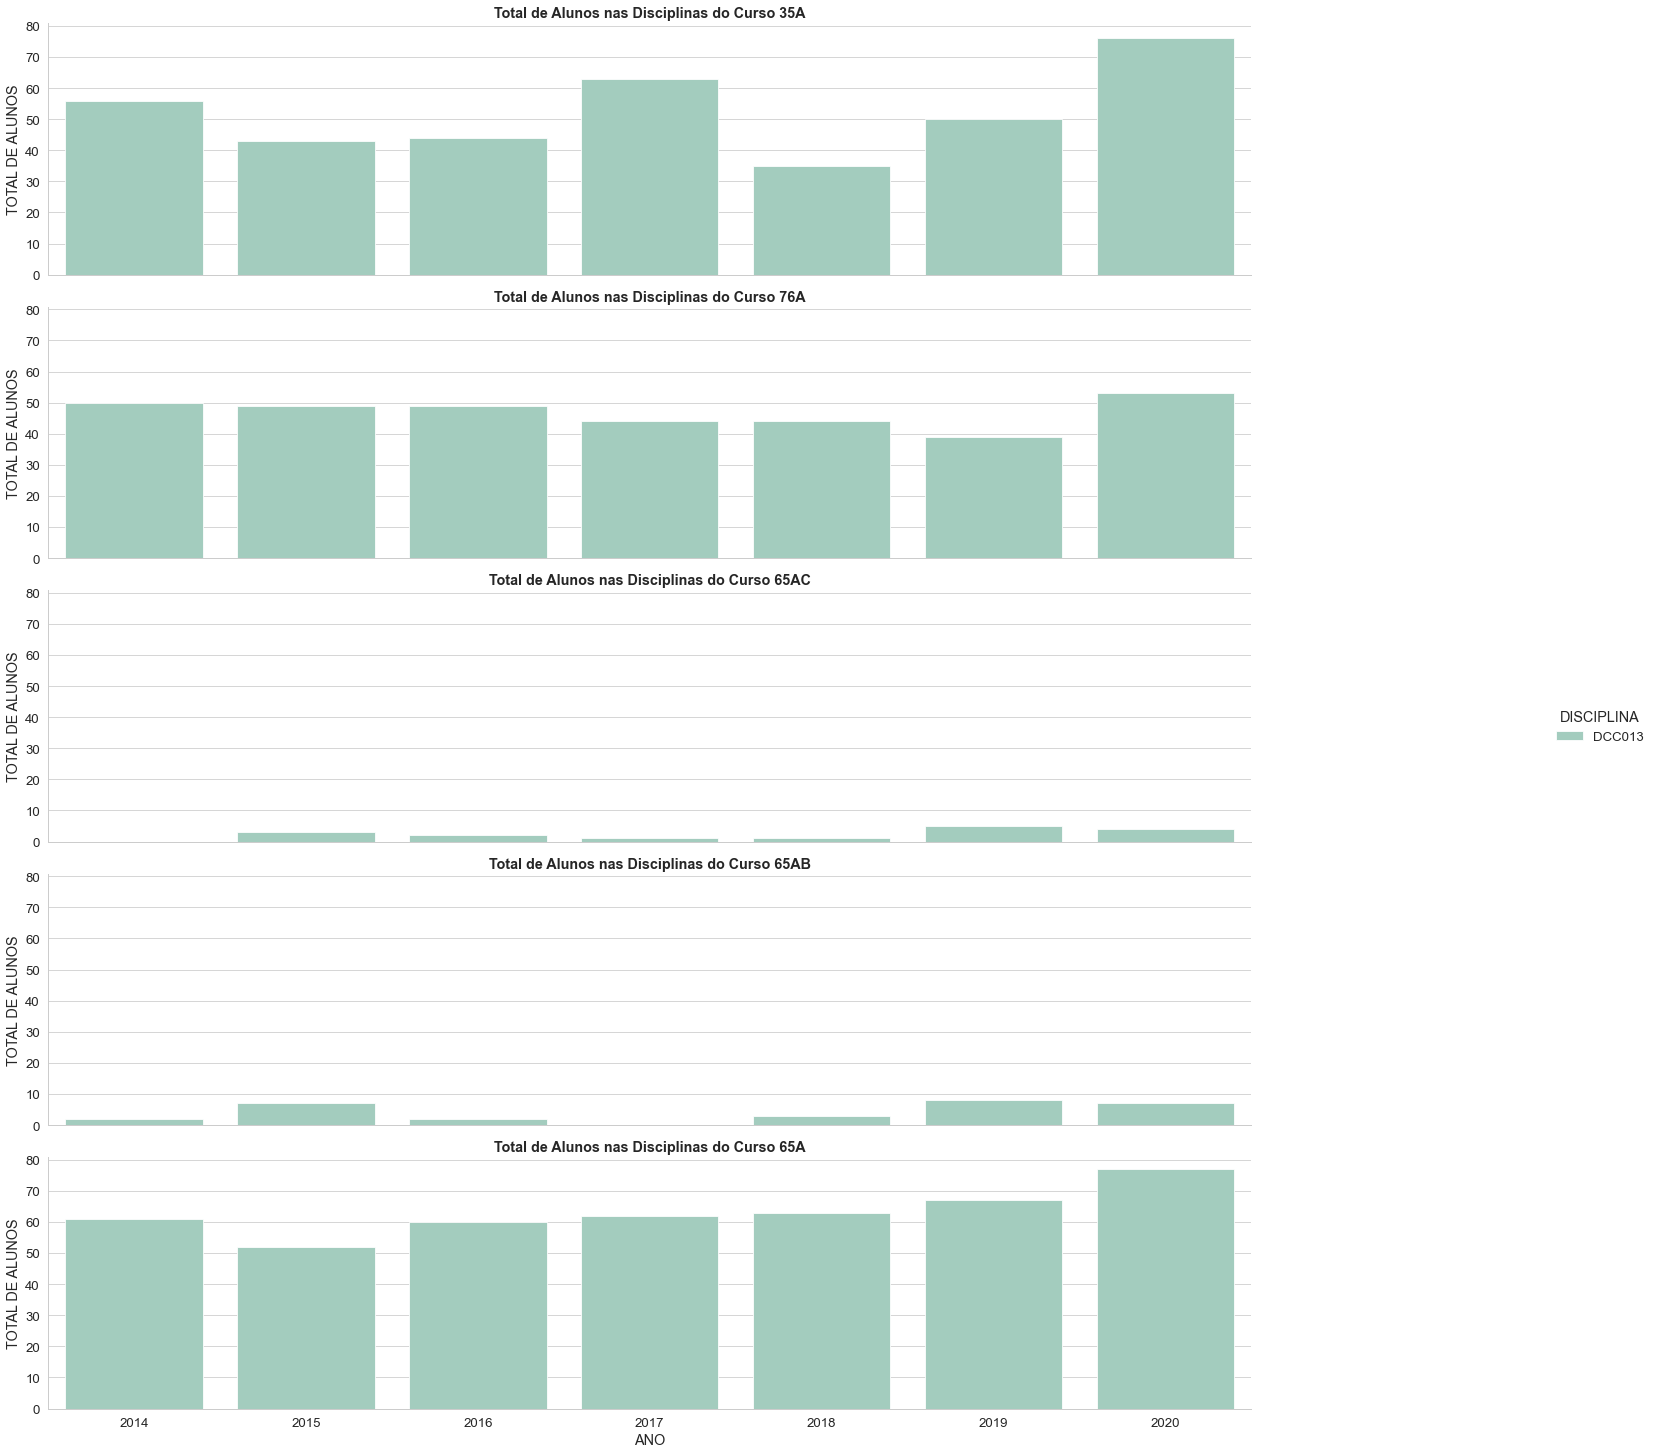

In [19]:
e = sns.catplot(data=por_curso, x="ANO", y="TOTAL DE ALUNOS", row = "CODIGO_CURSO", kind="bar", hue="DISCIPLINA",
           row_order=['35A', '76A', '65AC', '65AB', '65A'], estimator=np.sum, ci=None,
            palette=['#9CD3C0', '#FF9999'])
e.fig.set_figheight(20)
e.fig.set_figwidth(25)
e.set_titles("Total de Alunos nas Disciplinas do Curso {row_name}", fontdict= {'fontweight':'bold'})

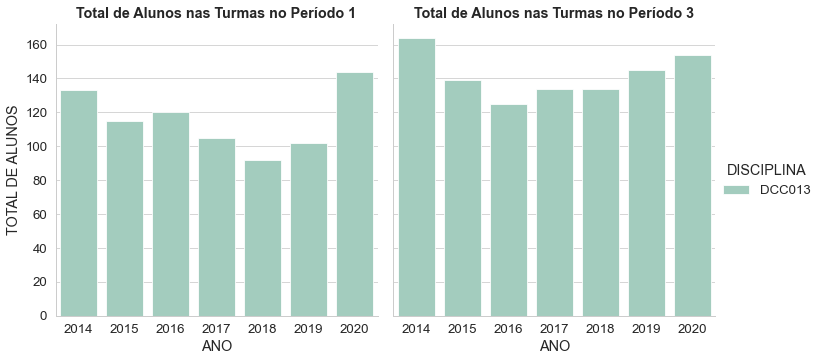

In [20]:
f= sns.catplot(data=por_curso, x="ANO", y="TOTAL DE ALUNOS", kind="bar", hue="DISCIPLINA", col="PERIODO",
           estimator=np.sum, ci=None, palette=['#9CD3C0', '#FF9999'] )
f.set_titles("Total de Alunos nas Turmas no Período {col_name}", fontdict= {'fontweight':'bold'})

In [21]:
situacao1 = one.groupby(["ANO", "PERIODO", "DISCIPLINA"])[["TOTAL DE ALUNOS"]].sum().reset_index()
display(situacao1)

,ANO,PERIODO,DISCIPLINA,TOTAL DE ALUNOS
0,2014,1,DCC013,133
1,2014,3,DCC013,164
2,2015,1,DCC013,115
3,2015,3,DCC013,139
4,2016,1,DCC013,120
5,2016,3,DCC013,125
6,2017,1,DCC013,105
7,2017,3,DCC013,134
8,2018,1,DCC013,92
9,2018,3,DCC013,134


In [22]:
def total_alunos(ano, periodo, disciplina):
    return situacao1.query("ANO == @ano and PERIODO == @periodo and DISCIPLINA == @disciplina").iloc[0]["TOTAL DE ALUNOS"]

In [23]:
situacao2 = one.groupby(["ANO", "PERIODO", "DISCIPLINA", "SITUACAO"])[["TOTAL DE ALUNOS"]].sum().reset_index()
display(situacao2)

,ANO,PERIODO,DISCIPLINA,SITUACAO,TOTAL DE ALUNOS
0,2014,1,DCC013,Aprovado,33
1,2014,1,DCC013,Rep Freq,39
2,2014,1,DCC013,Rep Nota,42
3,2014,1,DCC013,Trancado,19
4,2014,3,DCC013,Aprovado,61
5,2014,3,DCC013,Rep Freq,35
6,2014,3,DCC013,Rep Nota,39
7,2014,3,DCC013,Trancado,29
8,2015,1,DCC013,Aprovado,37
9,2015,1,DCC013,Rep Freq,37


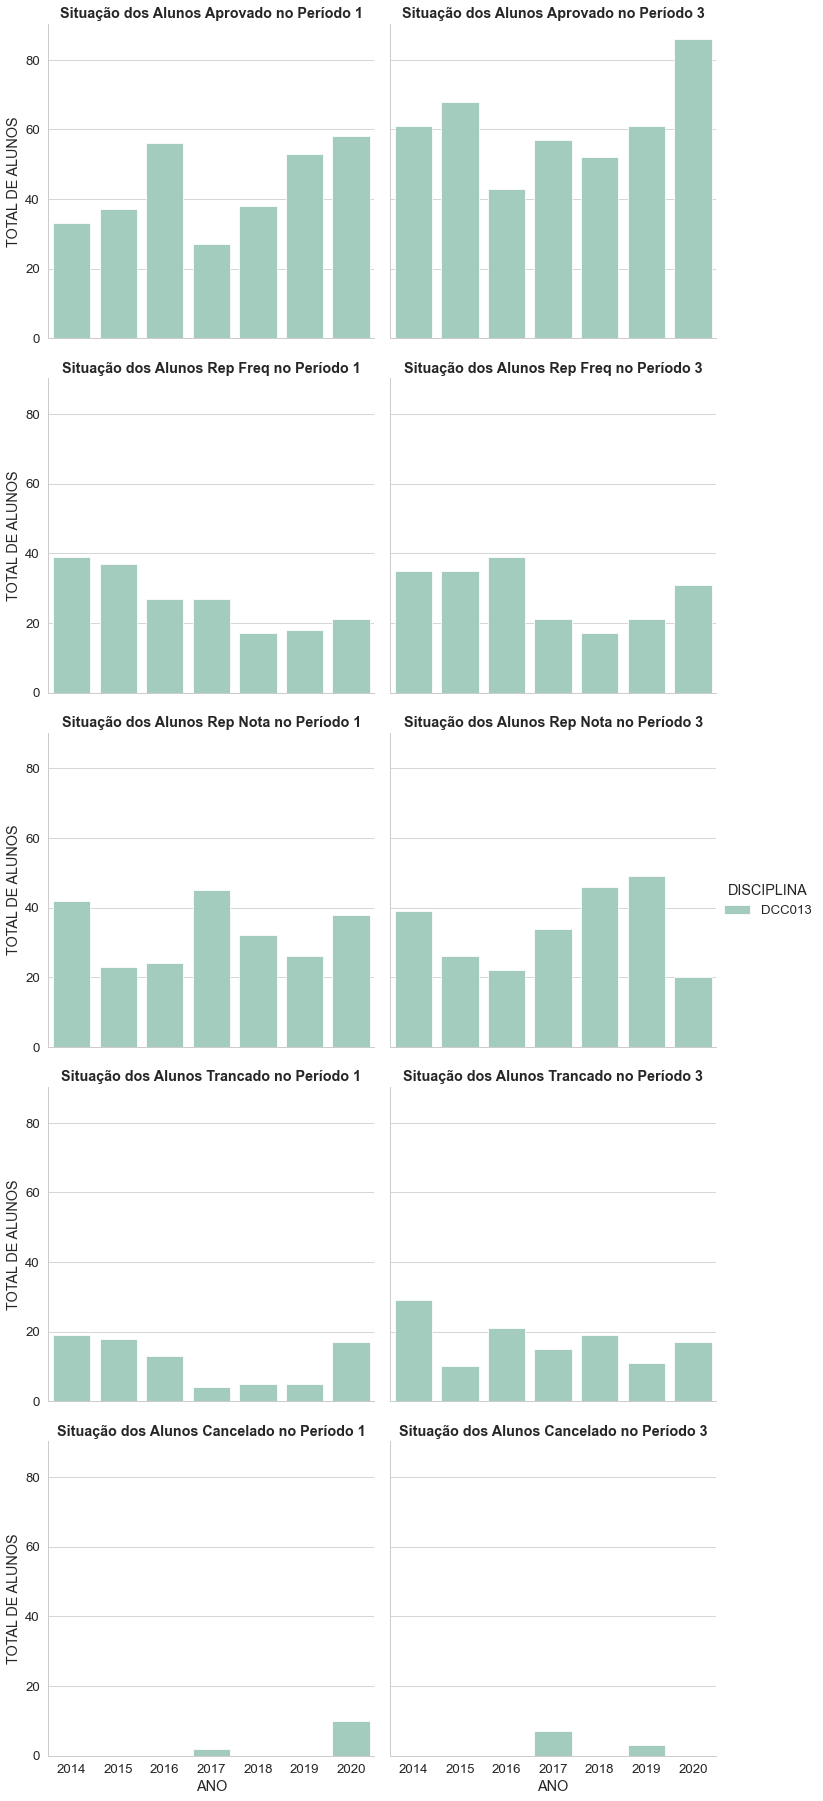

In [24]:
g = sns.catplot(data=situacao2, x="ANO", y="TOTAL DE ALUNOS", kind="bar", row="SITUACAO", hue="DISCIPLINA",
            col="PERIODO", estimator=np.sum, ci=None, palette=['#9CD3C0', '#FF9999'])
g.set_titles("Situação dos Alunos {row_name} no Período {col_name}",  fontdict= {'fontweight':'bold'})

In [25]:
situacao2["CALCULO_ALUNOS"] = 0
for index, row in situacao2.iterrows():
    calculo = (row['TOTAL DE ALUNOS']/(total_alunos(row["ANO"], row["PERIODO"], row["DISCIPLINA"])))*100
    situacao2.loc[index, 'CALCULO_ALUNOS'] = calculo
situacao2["ANOPERIODO"] = situacao2["ANO"].astype(str)+"."+situacao2["PERIODO"].astype(str)     
display(situacao2)

,ANO,PERIODO,DISCIPLINA,SITUACAO,TOTAL DE ALUNOS,CALCULO_ALUNOS,ANOPERIODO
0,2014,1,DCC013,Aprovado,33,24.812030,2014.1
1,2014,1,DCC013,Rep Freq,39,29.323308,2014.1
2,2014,1,DCC013,Rep Nota,42,31.578947,2014.1
3,2014,1,DCC013,Trancado,19,14.285714,2014.1
4,2014,3,DCC013,Aprovado,61,37.195122,2014.3
5,2014,3,DCC013,Rep Freq,35,21.341463,2014.3
6,2014,3,DCC013,Rep Nota,39,23.780488,2014.3
7,2014,3,DCC013,Trancado,29,17.682927,2014.3
8,2015,1,DCC013,Aprovado,37,32.173913,2015.1
9,2015,1,DCC013,Rep Freq,37,32.173913,2015.1


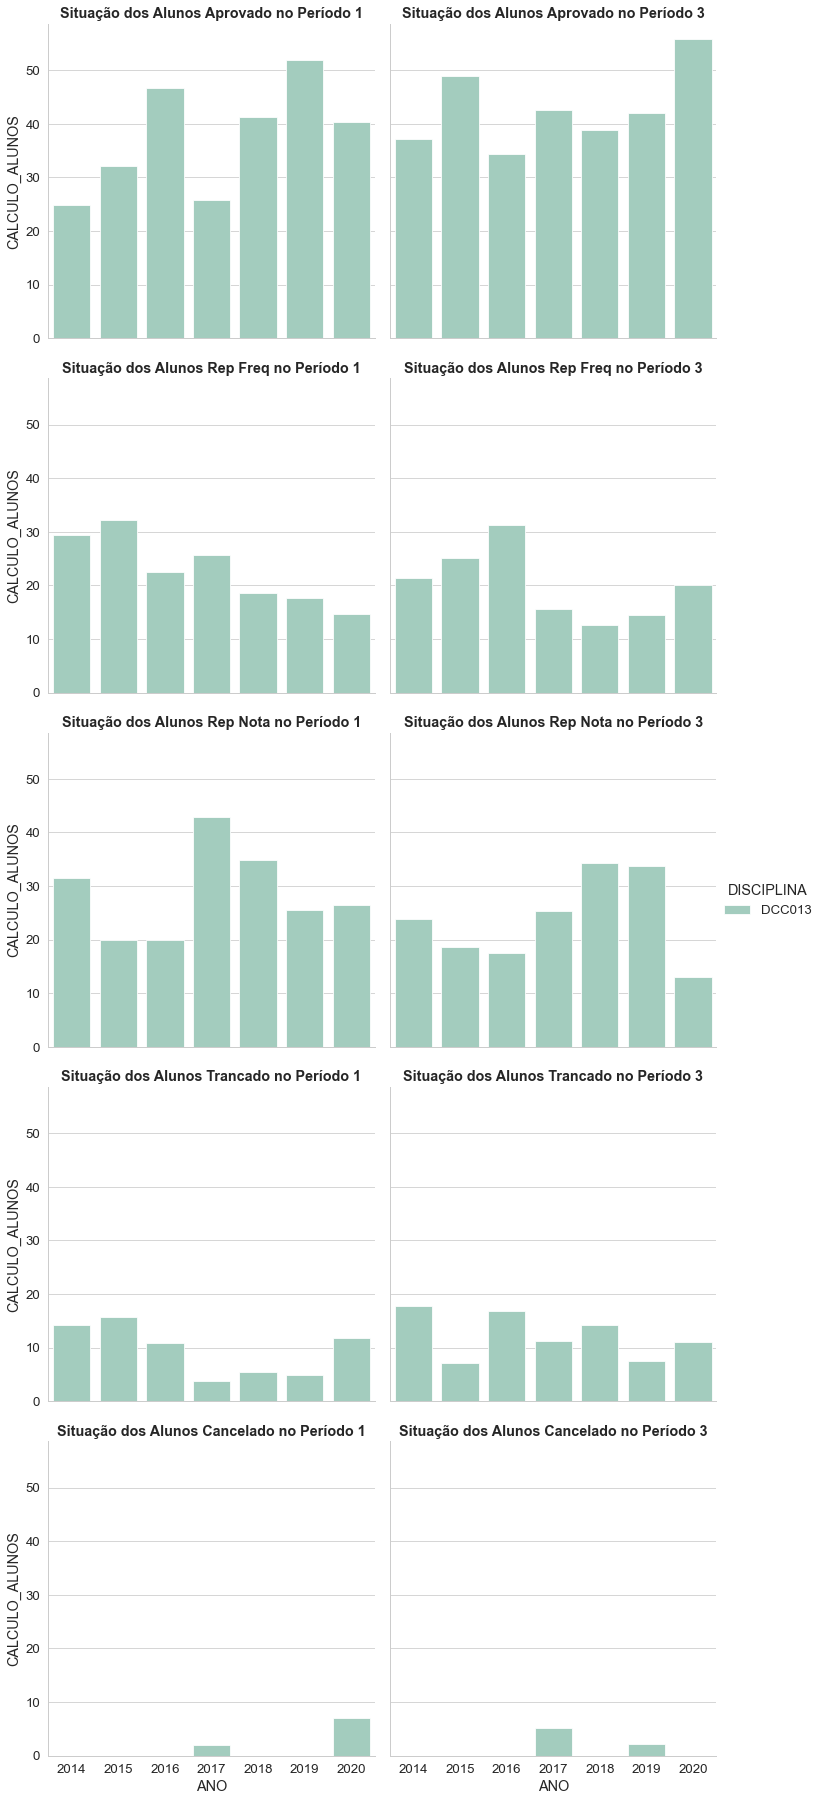

In [26]:
i = sns.catplot(data=situacao2, x="ANO", y="CALCULO_ALUNOS", kind="bar", row="SITUACAO", hue="DISCIPLINA", 
            col="PERIODO", estimator=np.sum, ci=None, palette=['#9CD3C0', '#FF9999'])
i.set_titles("Situação dos Alunos {row_name} no Período {col_name}", fontdict= {'fontweight':'bold'})

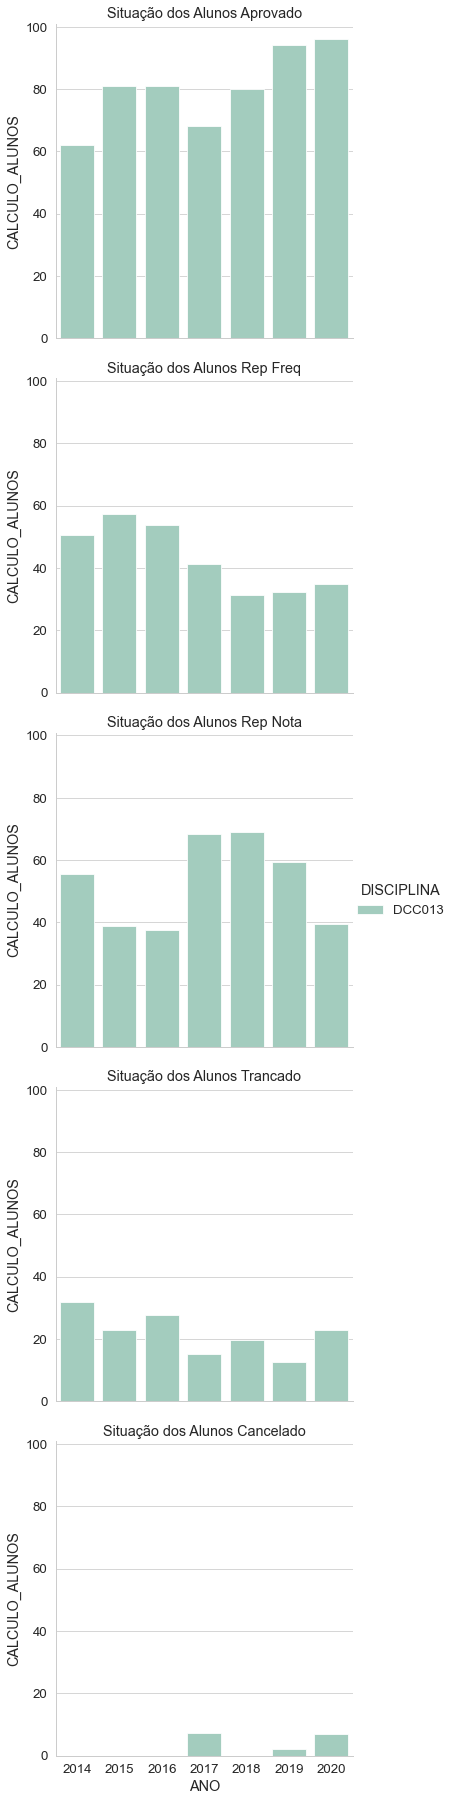

In [27]:
j =sns.catplot(data=situacao2, x="ANO", y="CALCULO_ALUNOS", kind="bar", row="SITUACAO",
            hue="DISCIPLINA", estimator=np.sum, ci=None, palette=['#9CD3C0', '#FF9999'])
j.set_titles("Situação dos Alunos {row_name}")

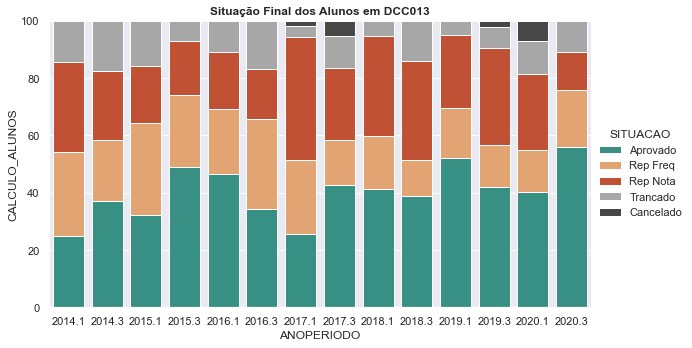

In [30]:
h= mycatplot(x="ANOPERIODO", y="CALCULO_ALUNOS", data=situacao2, kind="bar", aspect=1.7,
         ci=None, hue="SITUACAO",
          col="DISCIPLINA", palette=['#2A9D8F','#F4A261', '#D7431D', '#A8A7A8', '#474747'])
sns.set(rc = {'figure.figsize':(20,8)})
h.set_titles("Situação Final dos Alunos em {col_name}", fontdict= { 'fontsize': 30, 'fontweight':'bold'})
h.savefig("Situacao.pdf")
h.savefig("Situacao.png")